In [1]:
import yfinance as yf

data = yf.download('ESCORTS.NS', period='5y', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-25,655.599976,661.799988,645.500000,654.450012,643.418518,964200
2019-02-26,649.200012,668.000000,633.500000,660.900024,649.759827,1754000
2019-02-27,668.000000,678.250000,657.200012,663.349976,652.168457,1788950
2019-02-28,665.000000,669.750000,655.750000,657.599976,646.515381,984388
2019-03-01,672.599976,676.200012,663.400024,674.049988,662.688110,1699144


In [4]:
data.shape

(1235, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-02-25 to 2024-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [6]:
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
data_target = data.iloc[:1000,4]
data_test = data.iloc[1000:, 4]
steps = 7

data = data.iloc[:,[4]].values
# test = data[len(data) - len(data_test) - steps:]

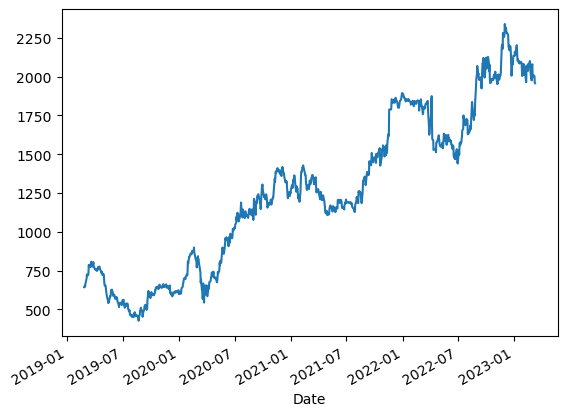

In [8]:
plot = data_target.plot()

In [9]:
print("Length of Data:{}".format(len(data)))
print("Length of Target Data:{}".format(len(data_target)))

Length of Data:1235
Length of Target Data:1000


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
def scale_data(data):
    scaler = MinMaxScaler(feature_range=(0,1))
    data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))
    plot_scaled = pd.DataFrame(data_scaled).plot()
    print(data.shape)
    return data_scaled, scaler

(1000,)
(1000,)


array([[0.11302294],
       [0.11633992],
       [0.11759981],
       [0.11464283],
       [0.12310237],
       [0.14305558],
       [0.15588632],
       [0.15460064],
       [0.15179795],
       [0.15732622],
       [0.18689605],
       [0.18170206],
       [0.18774455],
       [0.18815598],
       [0.18072493],
       [0.19363284],
       [0.19895541],
       [0.1901616 ],
       [0.18206202],
       [0.190213  ],
       [0.19766975],
       [0.18399054],
       [0.17486247],
       [0.17365391],
       [0.17126266],
       [0.17298535],
       [0.17187975],
       [0.16763711],
       [0.17491383],
       [0.17576243],
       [0.17229118],
       [0.18139352],
       [0.18082783],
       [0.18244772],
       [0.17270252],
       [0.16537436],
       [0.1596661 ],
       [0.16452584],
       [0.16172315],
       [0.15398351],
       [0.15645202],
       [0.12659929],
       [0.11857694],
       [0.11816554],
       [0.11009166],
       [0.09929226],
       [0.09008706],
       [0.083

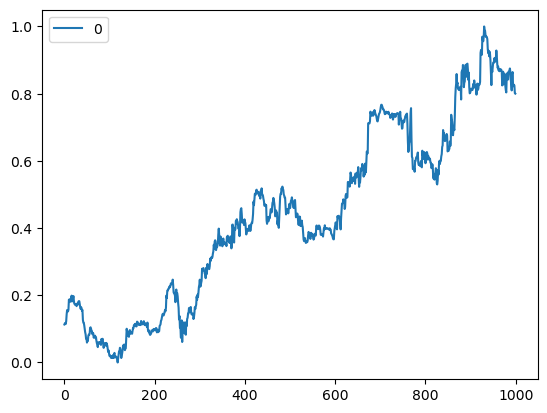

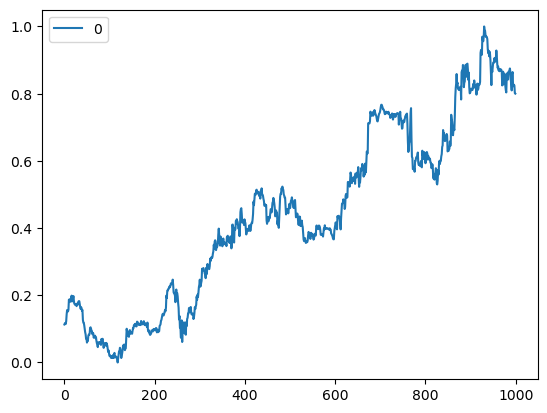

In [12]:
data_target_scaled = scale_data(data_target)[0]
scaler = scale_data(data_target)[1]
data_target_scaled

(235,)


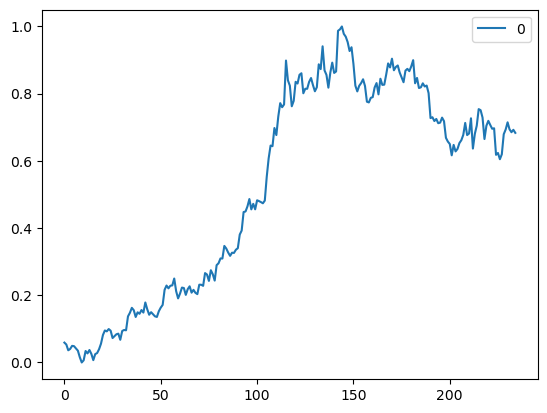

In [13]:
data_test_scaled = scale_data(data_test)[0]

In [15]:
def createPatternSet(data_target_scaled, steps=7):
    x_pattern = []
    y_price = []

    for day in range(steps, data_target_scaled.shape[0]):
        row = data_target_scaled[day-steps:day,0]
        x_pattern.append(row)
        y = data_target_scaled[day,0]
        y_price.append(y)

    x_pattern, y_price = np.array(x_pattern), np.array(y_price)
    x_pattern = x_pattern.reshape(x_pattern.shape[0], x_pattern.shape[1],1)

    return x_pattern, y_price

In [16]:
train_pattern = createPatternSet(data_target_scaled, steps=50)

In [17]:
x_train = train_pattern[0]
y_train = train_pattern[1]

In [18]:
x_train.shape

(950, 50, 1)

In [19]:
y_train.shape

(950,)